# <b> Loan Data Exploration</b>

# Preliminary Wrangling
><b>This document explores factors that affect a loan's outcome status</b>

In [96]:
#import neccessary packages for reading and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
#load dataset into pandas dataframe
df = pd.read_csv('LoanData.csv')

In [98]:
#print first few columns and rows of dataframe 
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [99]:
#Check the amount of rows and columns in dataset
df.shape

(113937, 81)

In [100]:
#Check Column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [101]:
#Check column names
list(df)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [102]:
#Took a look at summary statistics of the columns
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [103]:
#Took a look at the unique data in the columns I'll be using for further exploration
df.Term.unique(), df.LoanStatus.unique(), df.EmploymentStatus.unique(), df.Occupation.unique(), df.IsBorrowerHomeowner.unique(), df.BorrowerState.unique(), df['ProsperRating (Alpha)'].unique(), df.EstimatedLoss.unique(), df.EstimatedReturn.unique()

(array([36, 60, 12], dtype=int64),
 array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
        'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
        'Past Due (61-90 days)', 'Past Due (31-60 days)',
        'Past Due (91-120 days)', 'FinalPaymentInProgress',
        'Past Due (>120 days)'], dtype=object),
 array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
        nan, 'Not employed', 'Part-time', 'Retired'], dtype=object),
 array(['Other', 'Professional', 'Skilled Labor', 'Executive',
        'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
        'Waiter/Waitress', 'Construction', 'Computer Programmer',
        'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
        'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
        'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
        "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
        'Nurse (LPN)', 'Military Officer', 'Food Service Ma

In [104]:
#convert Term, Loan Status, EmploymentStatus into ordered categorical types
Cat_dict = {'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
        'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
        'Past Due (61-90 days)', 'Past Due (31-60 days)',
        'Past Due (91-120 days)', 'FinalPaymentInProgress'],
                    'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired'],
                  'ProsperRating (Alpha)' : ['A', 'D', 'B', 'E', 'C', 'AA', 'HR'] }

for var in Cat_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = Cat_dict[var])
    df[var] = df[var].astype(ordered_var)

<b>Structure of dataset</b>

The structure of this dataset consists of 81 columns and 113937 rows. Most columns are numeric types but there are a few categoric types too that'll used for further analysis

<b>Main features of interest in the dataset</b>

This is a large dataset with many variables, so I will only use some of the variables that'll assist in figuring out how these factors impact the loan status. Those variables are BorrowerRate, CreditScoreRangeLower,CreditScoreRangeUpper, BorrowerAPR, EstimatedLoss, EstimatedReturn, Term ,IncomeRange, LoanStatus, EmploymentStatus, IsBorrowerHomeowner

<b>Features of interest in the dataset that'll be usefull for investigating this dataset</b>

I expect the employment status, credit score and the income range to be the three variables that have the largest impact on what the loan status of the client will be the other variables might have an impact but not as large as these three

# Univariate Exploration
> I'll begin by looking into different variables that affect loan status

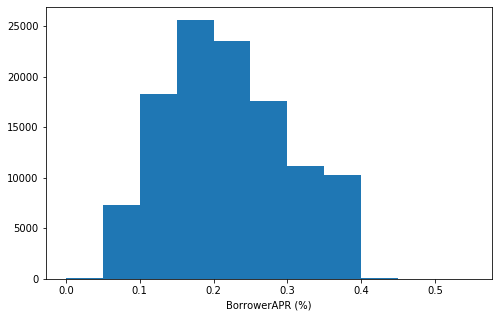

In [105]:
#I began with a histogram to look at the borrowerAPR
binsize = 0.05
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR (%)')
plt.show()

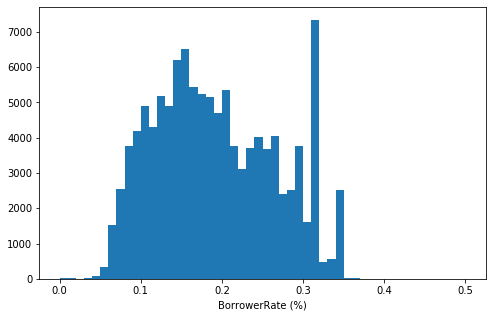

In [106]:
#Plotted another histogram to check borrowerRate 
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate (%)')
plt.show()

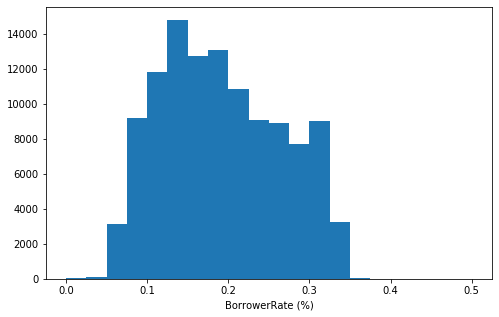

In [107]:
#Plotted another histogram with smaller bin size to view graph without longtail
binsize = 0.025
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate (%)')
plt.show()

In [108]:
#Create new column that consists of the loan length in years
def Loan_Length(Term):
    if Term <= 12:
        return '1 Year'
    elif Term <= 36:
        return '3 Years'
    elif Term <= 60:
        return '5 Years'
    else :
        return 'Other'

df['Loan_Length'] = df['Term'].apply(Loan_Length)

In [109]:
#Test previous code
df['Loan_Length'].unique()

array(['3 Years', '5 Years', '1 Year'], dtype=object)

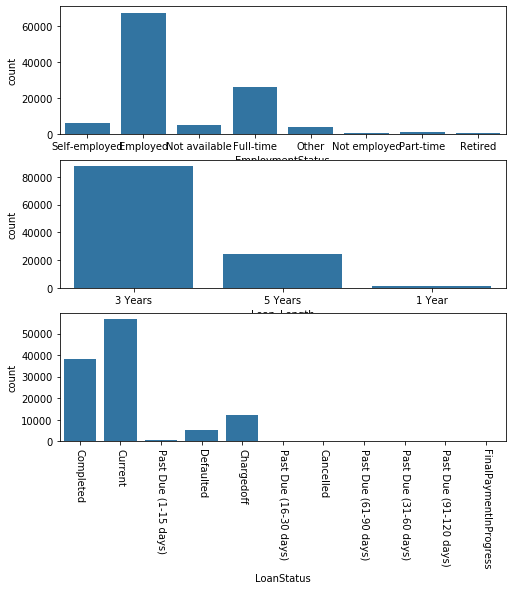

In [110]:
# Then I plot three variables together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sns.color_palette()[0]

sns.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[0])

sns.countplot(data = df, x = 'Loan_Length', color = default_color, ax = ax[1])

sns.countplot(data = df, x = 'LoanStatus', color = default_color, ax = ax[2])
plt.xticks(rotation = 270)

plt.show()

In [111]:
#Group income range for better visual representation
grouped = df.groupby('IncomeRange')
grouped.first()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Loan_Length
IncomeRange,,,,,,,,,,,,,,,,,,,,,
$0,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157000000,A,36,Chargedoff,2009-04-09 00:00:00,0.18454,0.1700,0.1600,...,0.00,4381.62,4381.62,0.0,1.0,0,0,0.0,115,3 Years
"$1-24,999",0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,53,3 Years
"$100,000+",0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,B,36,Current,2012-12-21 00:00:00,0.24614,0.2085,0.1985,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,20,3 Years
"$25,000-49,999",1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,258,3 Years
"$50,000-74,999",10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,D,36,Current,2012-12-19 00:00:00,0.12016,0.0920,0.0820,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1,3 Years
"$75,000-99,999",0F123545674891886D9F106,587746,2012-05-10 07:04:01.577000000,E,60,Current,2013-07-03 00:00:00,0.27462,0.2489,0.2389,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,19,5 Years
Not displayed,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,41,3 Years
Not employed,0F1D338731363098438C9F5,122819,2007-04-12 17:00:57.690000000,D,36,Completed,2010-04-17 00:00:00,0.16802,0.1500,0.1200,...,-33.29,0.00,0.00,0.0,1.0,0,0,0.0,1,3 Years


In [112]:
#Check the numbers for the income range groups
grouped.size()

IncomeRange
$0                  621
$1-24,999          7274
$100,000+         17337
$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
Not displayed      7741
Not employed        806
dtype: int64

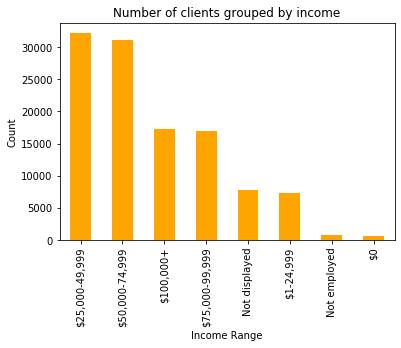

In [113]:
#PLot bar graph representing the numbers above
df.IncomeRange.value_counts().plot(kind='bar', alpha=1, color='orange')
plt.xlabel("Income Range")
plt.ylabel("Count")

plt.title("Number of clients grouped by income");

In [114]:
#Count number of missing data
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Loan_Length                        0
Length: 82, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text xticklabel objects>)

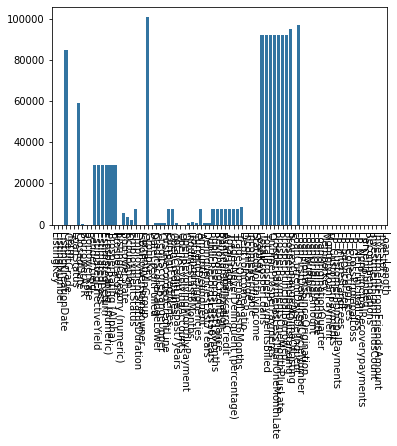

In [115]:
#Plot the numbers above on a barplot
na_counts = df.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 270)

In [116]:
#drop columns that won't be used for further analysis
df.drop(columns = ['LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
 'LP_CollectionFees',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'PercentFunded',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'InvestmentFromFriendsAmount',
 'Investors','IncomeVerifiable',
 'StatedMonthlyIncome',
 'LoanKey',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanCurrentDaysDelinquent',
 'LoanFirstDefaultedCycleNumber',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'LoanOriginalAmount',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey',
 'MonthlyLoanPayment',
 'ListingCreationDate',
 'CreditGrade','FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'GroupKey','CurrentlyInGroup',
'ClosedDate',
'DateCreditPulled',
'BorrowerState','Occupation',
'EmploymentStatusDuration',
'EstimatedEffectiveYield'], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

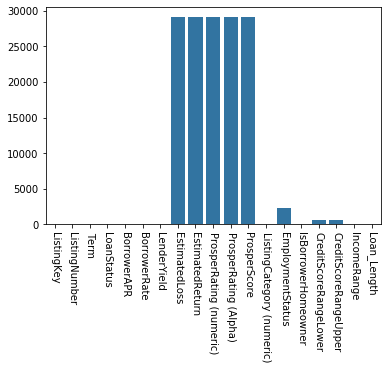

In [117]:
#Plot the empty values again from shortened dataframe
na_counts = df.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 270)

<b>Distributions of selected variables</b>

- The BorrowerRate histogram had a long tail in the first graph, I changed the bin size to have a better representation of the data
- Grouped the Income Range data and plotted it on a bar graph

<b>Data Cleaning/Tidying data and data form rearranging</b>
- PLotted columns with null values and removed columns that won't be neccessary for the analysis to get a better visual. Four columns have large null values in the shortened dataset 
- Created a new column that consists of data from the 'Term' column and renamed the data so its easier to understand when plotting the data

# Bivariate Exploration

In [118]:
#Set two variables that store numeric and categoric values seperately 
numeric_values = ['BorrowerRate', 'CreditScoreRangeLower','CreditScoreRangeUpper','BorrowerAPR',
                  'EstimatedLoss','EstimatedReturn']
categoric_values = ['Term','IncomeRange','LoanStatus','EmploymentStatus', 'IsBorrowerHomeowner'] 

In [119]:
#Set homeowner true and false values to two variables and checked average of homeowners
is_homeowner = df.IsBorrowerHomeowner == True
no_home = df.IsBorrowerHomeowner == False
df.IsBorrowerHomeowner[is_homeowner].count().mean()

57478.0

In [120]:
#Checked the avegrage of people with no homes 
df.IsBorrowerHomeowner[no_home].count().mean()

56459.0

In [121]:
#Count homeowners and no-home clients by loan status
df.groupby('LoanStatus')['IsBorrowerHomeowner'].value_counts()

LoanStatus              IsBorrowerHomeowner
Completed               False                  19794
                        True                   18280
Current                 True                   30478
                        False                  26098
Past Due (1-15 days)    False                    429
                        True                     377
Defaulted               False                   2744
                        True                    2274
Chargedoff              False                   6661
                        True                    5331
Past Due (16-30 days)   False                    137
                        True                     128
Cancelled               False                      3
                        True                       2
Past Due (61-90 days)   True                     179
                        False                    134
Past Due (31-60 days)   True                     184
                        False                    179
Pa

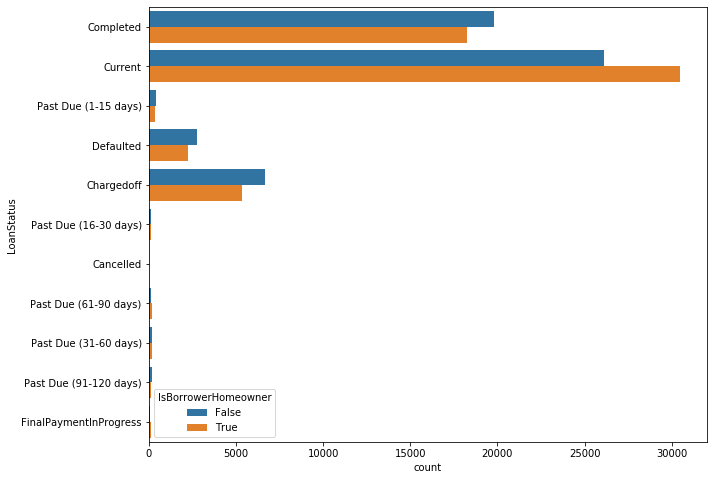

In [122]:
#Plot homeowner data against Loanstatus on stacked graph
plt.figure(figsize=[10, 8])
sns.countplot(data = df, y = 'LoanStatus', hue = 'IsBorrowerHomeowner')

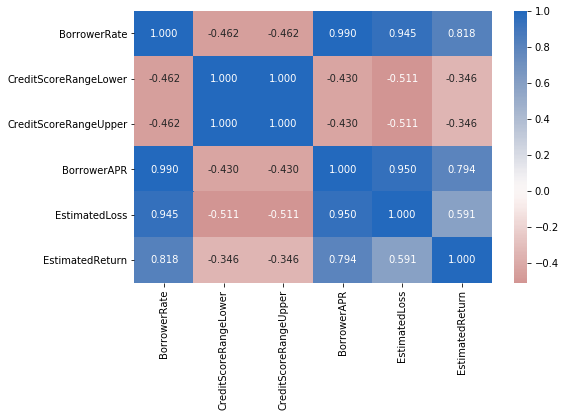

In [123]:
#Correlation plot for numeric variables
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_values].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

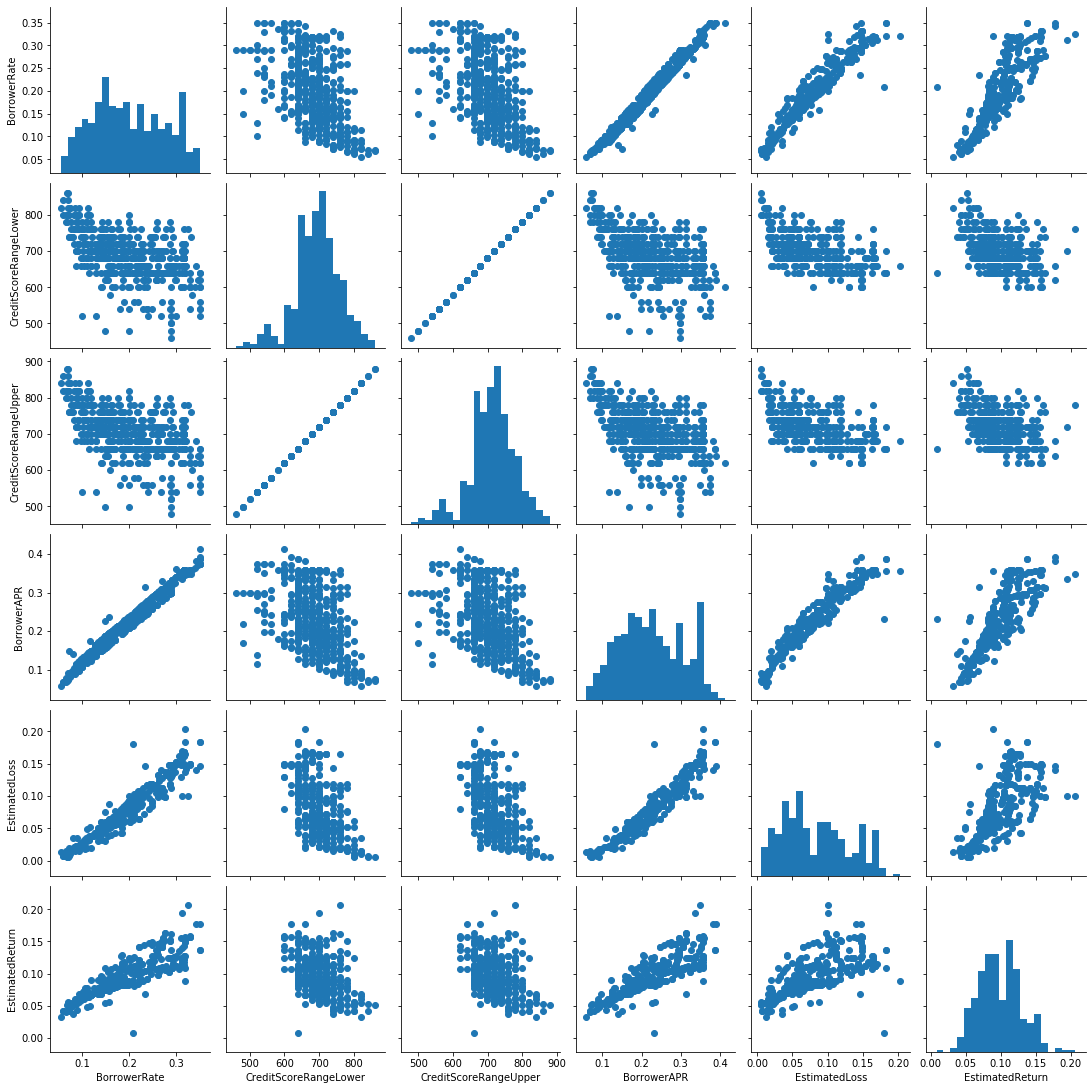

In [124]:
#Plot matrix to see correlation betwween selected variables
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sns.PairGrid(data = df_samp, vars = numeric_values)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

C:\Users\Acer\Anaconda3\envs\my_env\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

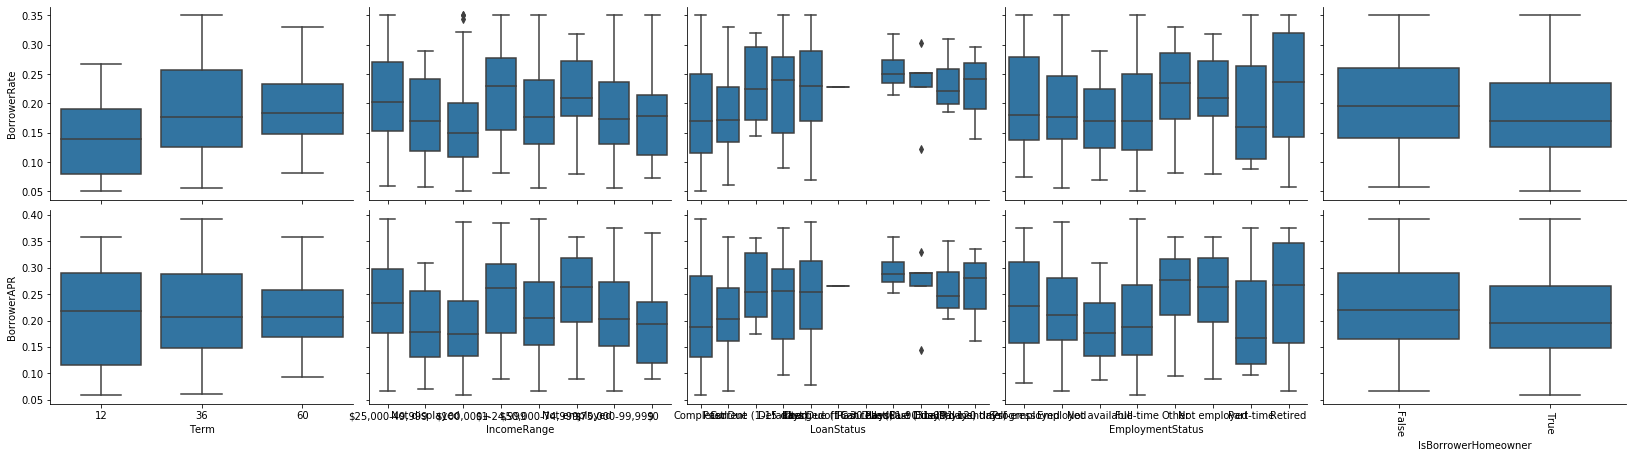

In [150]:
#plot matrix of numeric features against categorical features, starting with rates
samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_samp, y_vars = ['BorrowerRate', 'BorrowerAPR'] , x_vars = categoric_values,
                size = 3, aspect = 1.5)
plt.xticks(rotation = 270)
g.map(boxgrid)
plt.show();

C:\Users\Acer\Anaconda3\envs\my_env\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

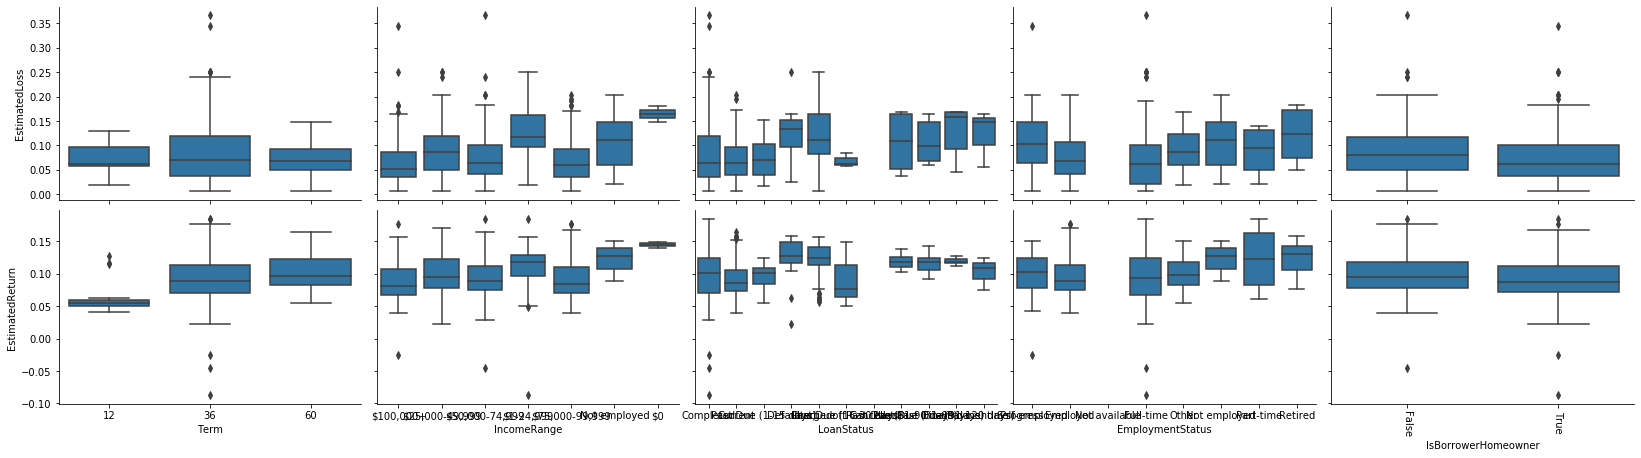

In [151]:
#plot matrix of numeric features against categorical features, plotting estimated losses and returns
samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_samp, y_vars = ['EstimatedLoss', 'EstimatedReturn'], x_vars = categoric_values,
                size = 3, aspect = 1.5)
plt.xticks(rotation = 270)
g.map(boxgrid)
plt.show();

C:\Users\Acer\Anaconda3\envs\my_env\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

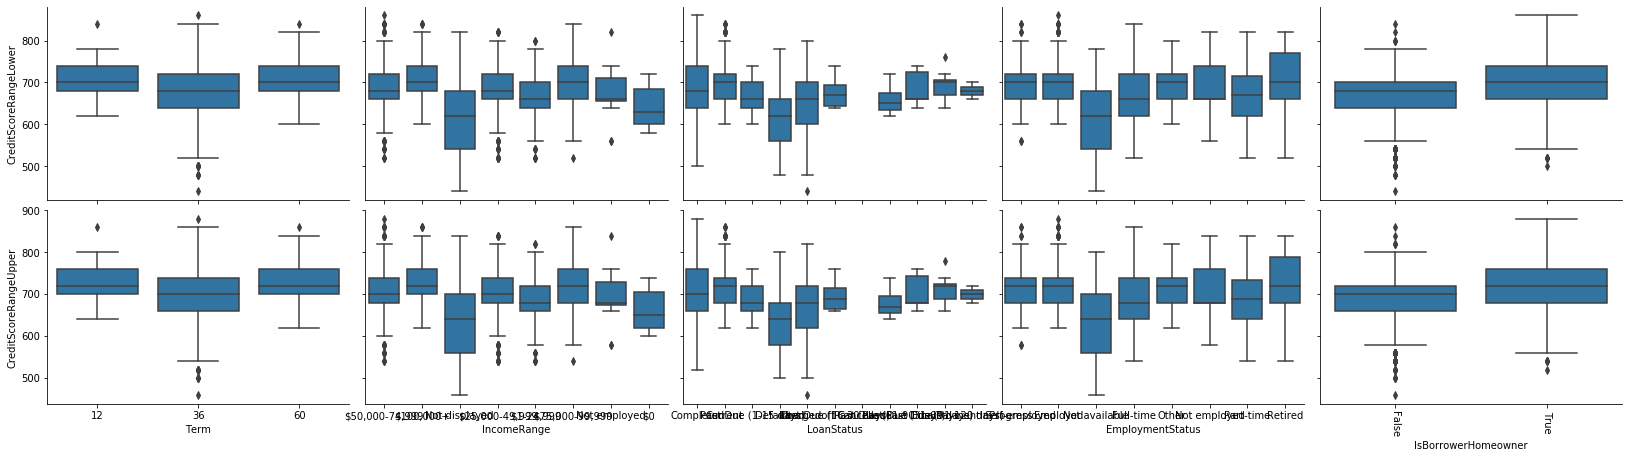

In [152]:
#plot matrix of numeric features against categorical features, plotting creditscores
samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_samp, y_vars = ['CreditScoreRangeLower', 'CreditScoreRangeUpper'], x_vars = categoric_values,
               size = 3, aspect = 1.5)
plt.xticks(rotation = 270)
g.map(boxgrid)
plt.show();

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

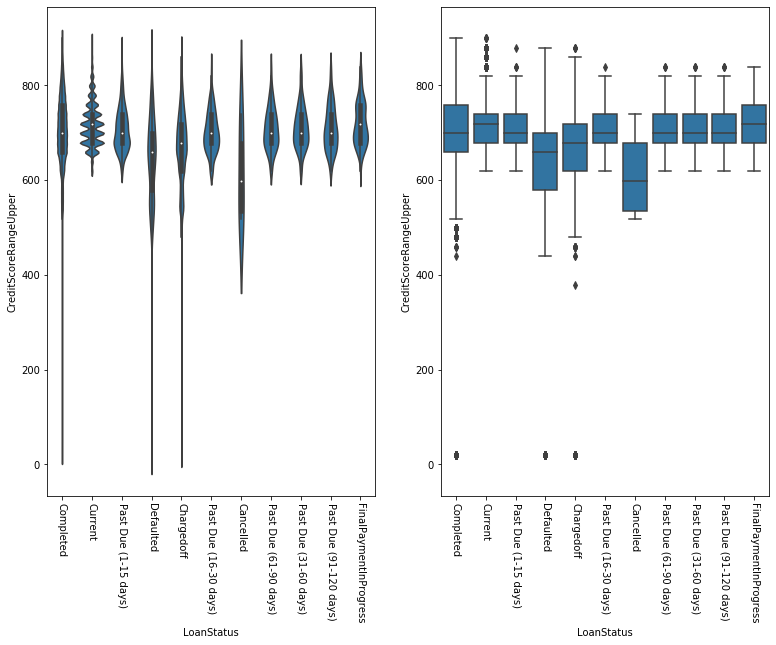

In [128]:
#plot violin and box plots using loan status and Credit Score
plt.figure(figsize = [20, 9])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sns.violinplot(data = df, x = 'LoanStatus', y = 'CreditScoreRangeUpper', color = base_color)
plt.xticks(rotation = 270)

# right plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'LoanStatus', y = 'CreditScoreRangeUpper', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 270)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

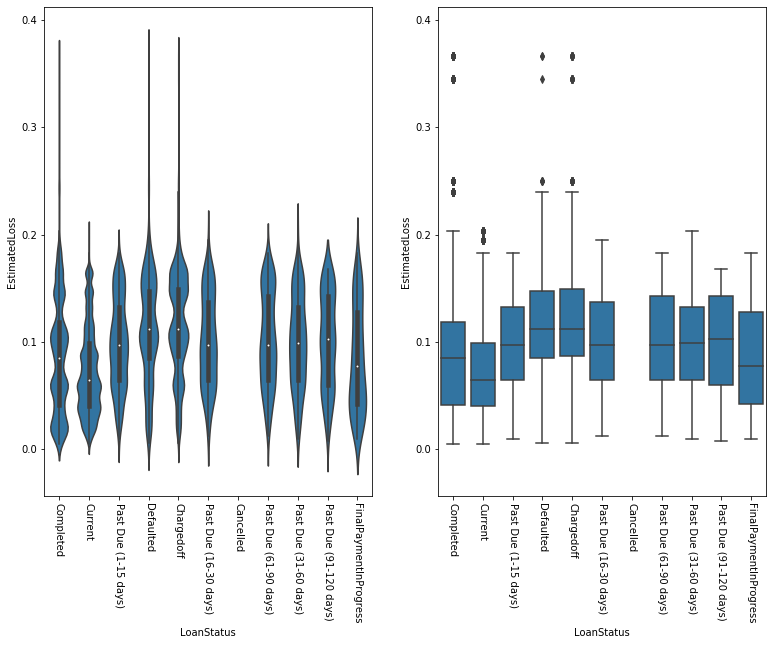

In [129]:
#plot violin and box plots using loan status and estimated loss
plt.figure(figsize = [20, 9])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sns.violinplot(data = df, x = 'LoanStatus', y = 'EstimatedLoss', color = base_color)
plt.xticks(rotation = 270)

# right plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'LoanStatus', y = 'EstimatedLoss', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 270)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

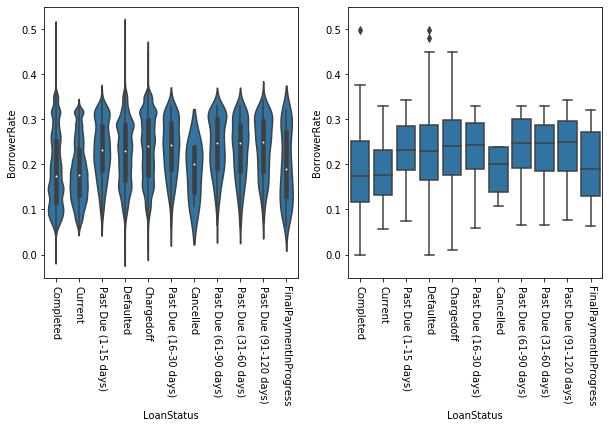

In [130]:
#plot violin and box plots using Loan Status and Borrower Rate
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 270)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 270)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

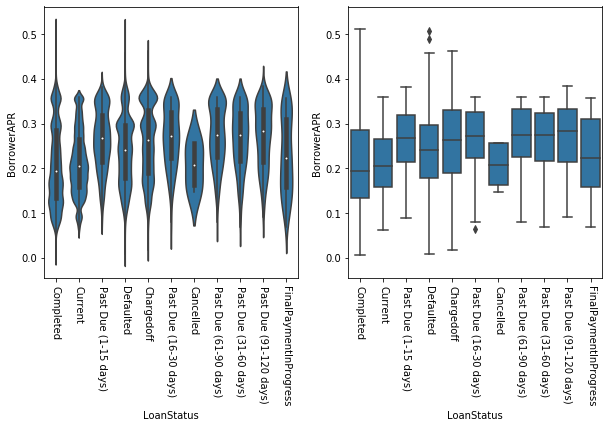

In [131]:
#plot violin and box plots using LoanStatus and BorrowerAPR
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 270)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 270)

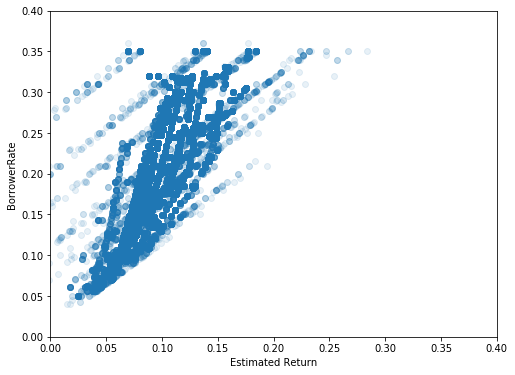

In [132]:
# scatter plot of BorrowerRate vs. EstimatedReturn
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'EstimatedReturn', y = 'BorrowerRate', alpha = 1/10)
plt.xlim([0, 0.4])
plt.xlabel('Estimated Return')
plt.ylim([0, 0.4])
plt.ylabel('BorrowerRate')
plt.show()

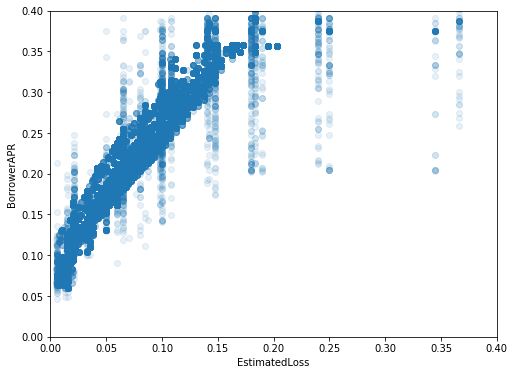

In [133]:
# scatter plot of BorrowerAPR vs. EstimatedLoss
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'EstimatedLoss', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, 0.4])
plt.xlabel('EstimatedLoss')
plt.ylim([0, 0.4])
plt.ylabel('BorrowerAPR')
plt.show()

<b>Observed relationships in the Bivariate part of the investigation</b>
- The Violin plots reveal more information on how the plotted variables affect the loan status. We can see a decrease in the annual percentage rate with clients whose loan status isn't 'past due'. Those whose loans are current, in progress and completed have lower rates than the rest. The same goes for the borrower rate.
- They also reveal that the clients whose loan status isn't 'past due' have lower estimated loss percentanges.
- They also reveal that clients whose payments are past due have higher estimated returns, this is probably because the clients will get fined for not paying on time and will have to pay more to the bank
- The stacked bar graph reveals that most clients with the current status are homeowners, majority of the rest of the statuses are not homeowners

# Multivariate Exploration

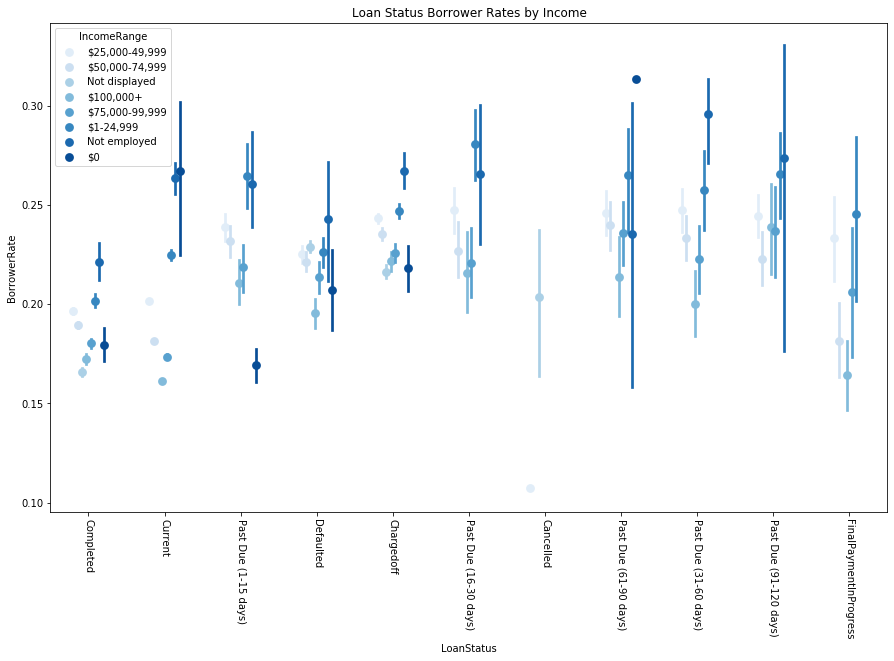

In [149]:
#Plot pointplot
fig = plt.figure(figsize = [15,9])
ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Status Borrower Rates by Income')
plt.ylabel('BorrowerRate')
plt.xticks(rotation = 270)
plt.show();

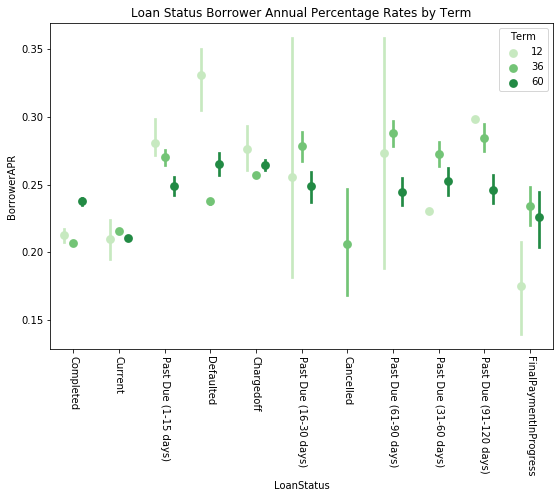

In [137]:
#Plot pointplot
fig = plt.figure(figsize = [9,6])
ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Status Borrower Annual Percentage Rates by Term')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation = 270)
plt.show();

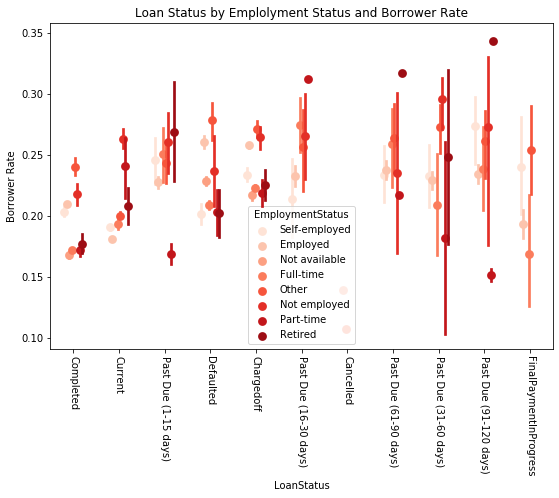

In [138]:
#Plot Estimated Returns 
fig = plt.figure(figsize = [9,6])

ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Reds', linestyles = '', dodge = 0.4)
plt.title('Loan Status by Emplolyment Status and Borrower Rate')
plt.ylabel('Borrower Rate')
plt.xticks(rotation = 270)
plt.show();

<b>Observed relationships in the multivariate exploration</b>
- The borrower rate seems to be low across the loan status amoung the higher earning clients
- The borrower annual percentage rates for the past due loan statuses have a pattern where the shorter terms have higher rates and longer terms have lower annual rates
- The return graph indicates that there's a higher return with loan statuses that are 60 months long 
- The borrower rate is higher for clients with past due loan status and are also unemployed. Employed clients with past due loan status have lower borrower rates